# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

## Содержание  


* [1.Описание данных и задач](#данные)
* [2.Импорт библиотек и изучение общей информации](#импорт)
* [3.Изучение пропусков и предложения по их заполнению](#пропуски1)
* [4.Заполнение пропущенных значений](#пропуски2)
    * [4.1 Наличие балкона](#пропускиБ)
    * [4.2 Аппартаменты](#пропускиА)
    * [4.3 Этажность зданий](#пропускиЭ)
    * [4.4 Жилая площадь](#пропускиЖП)
    * [4.1 Площадь кухни](#пропускиПК)
    * [4.1 Населенный пункт](#пропускиНП)
    * [4.1 Близость к центру](#пропускиБЦ)
    * [4.1 Высота потолков](#пропускиВП) 
* [5.Добавление новых столбцов в таблицу и изменение типов данных](#типы)    
    * [5.1 Изменение типа данных даты публикации и добавление дня недели, дата, года публикации](#типыТД)
    * [5.2 Работа с ценой за квартиру и за квадратный метр](#типыЦТ)
    * [5.3 Коэффициенты отношений жилой площади и кухни к общей](#типыКО)
    * [5.4 Расстояние до центра в км](#типыКМ)
    * [5.5 Категоризация квартир по этажности](#типыКЭ)
    * [5.6 Изменение типов данных](#типыИТ)
* [6.Исследовательский анализ: изучаем площадь, цену, число комнат, высоту потолков](#ИАОП)
    * [6.1 Диаграммы размаха площади, цены, числа комнат, высоты потолка](#ИАОПДР)
    * [6.2 Гистограммы площади, цены, числа комнат, высоты потолка](#ИАГОП)    
* [7.Исследовательский анализ: изучаем время продажи квартиры](#ИАВП)
* [8.Исследовательский анализ: изучаем влияние факторов на стоимость квартиры](#ИАЦК)
    * [8.1.Зависимость стоимости от количества комнат в квартире](#ИАЦККК)
    * [8.2.Зависимость стоимости от близости к центру](#ИАЦКБЦ)
    * [8.3.Зависимость стоимости от этажа квартиры](#ИАЦКЭК)
    * [8.4.Зависимость стоимости от дня недели размещения объявления](#ИАЦКДН)
    * [8.5.Зависимость стоимости от месяца размещения объявления](#ИАЦКМР)
    * [8.6.Зависимость стоимости от года размещения объявления](#ИАЦКГР)
    * [8.7.Матрица корреляции](#ИАЦККОР)
* [9.Исследовательский анализ: изучаем населенные пункты с наибольшим числом объявлений](#ИА10)
* [10.Исследовательский анализ: выделение центральной зоны Санкт-Петербурга](#ИАЦЗ)  
* [11.Исследовательский анализ: изучаем влияние факторов на стоимость квартиры в центре Санкт-Петербурга](#ИАЦФ)
    * [11.1.Гистограммы площади, цены, числа комнат, высоты потолка квартир в центре Санкт-Петербурга](#ИАЦФГ)    
    * [11.2.Зависимость стоимости квартир в центре Санкт-Петербурга от количества комнат в квартире](#ИАЦФКК)
    * [11.3.Зависимость стоимости квартир в центре Санкт-Петербурга от этажа квартиры](#ИАЦФЭК)
    * [11.4.Зависимость цены на квартиры в центре СПб от удаленности от Эрмитажа](#ИАЦФБЦ)
    * [11.5.Зависимость стоимости квартир в центре Санкт-Петербурга от дня недели размещения объявления](#ИАЦФДР)
    * [11.6.Зависимость стоимости квартир в центре Санкт-Петербурга от месяца размещения объявления](#ИАЦФМР)
    * [11.7.Зависимость стоимости квартир в центре Санкт-Петербурга от года размещения объявления](#ИАЦФГР)
    * [11.8.Матрица корреляции для квартир в центре Санкт-Петербурга ](#ИАЦФКОР)
* [12.Исследовательский анализ: сравнение результатов исследований квартир в центре Санкт-Петербурга с результатами по всему городу](#ИАСА)
* [13.Исследовательский анализ: общий вывод](#ИАОВ)

# 1. Описание данных <a name="данные"></a>

  * <b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)
  * <b>balcony</b> — число балконов
  * <b>ceiling_height</b> — высота потолков (м)
  * <b>cityCenters_nearest</b> — расстояние до центра города (м)
  * <b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)
  * <b>first_day_exposition</b> — дата публикации
  * <b>floor</b> — этаж
  * <b>floors_total</b> — всего этажей в доме
  * <b>is_apartment</b> — апартаменты (булев тип)
  * <b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)
  * <b>last_price</b> — цена на момент снятия с публикации
  * <b>living_area</b> — жилая площадь в квадратных метрах(м²)
  * <b>locality_name</b> — название населённого пункта
  * <b>open_plan</b> — свободная планировка (булев тип)
  * <b>parks_around3000</b> — число парков в радиусе 3 км
  * <b>parks_nearest</b> — расстояние до ближайшего парка (м)
  * <b>ponds_around3000</b> — число водоёмов в радиусе 3 км
  * <b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)
  * <b>rooms</b> — число комнат
  * <b>studio</b> — квартира-студия (булев тип)
  * <b>total_area</b> — площадь квартиры в квадратных метрах (м²)
  * <b>total_images</b> — число фотографий квартиры в объявлении

# Задачи:

## 1. Предобработка данных

* Определяем и изучаем пропущенные значения 
2. Заполняем пропуски, где это возможно. Объяснить, почему заполняем или нет, описать способ заполнения
3. Приводим данные к нужным типам (с пояснением выбора типа).


## 2. Посчитать и добавить в таблицу

* Цену квадратного метра. 
2. День недели, месяц и год публикации объявления.
3. Этаж квартиры; варианты — первый, последний, другой. 
4. Соотношение жилой и общей площади, а также отношение площади кухни к общей.

## 3. Анализ данных




* Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.

2. Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?  

3. Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили. 

4. Определяем какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.

5. Выбираем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. Выделяем населённые пункты с самой высокой и низкой стоимостью жилья. 

6. Изучаем предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделяем квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создаем столбец с расстоянием до центра в километрах: округляем до целых значений. После этого считаем среднюю цену для каждого километра. Строим график: он должен показывать, как цена зависит от удалённости от центра. Определяем границу, где график сильно меняется — это и будет центральная зона.    

7. Выделяем сегмент квартир в центре. Анализируем эту территорию и изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Также выделяем факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Делаем выводы. Отличаются ли они от общих выводов по всему городу?  


### Шаг 1. Откройте файл с данными и изучите общую информацию. <a name="импорт"></a>

## 2. Импорт библиотек и изучение общей информации <a name="импорт"></a>

In [1]:
#импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
#сохраняем датафрейм в переменную realty и выводим статистические данные

realty = pd.read_csv('', sep='\t')
realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


 В общем всё хорошо, но есть странные выбросы типа 100 метровых потолков или 1580 дней размещения объявлений.

Посмотрим на таблицу, выведем первые 10 строк

In [3]:
realty.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Много пропусков, дробные значения этажности зданий и дней размещения объявлений и т.д. Начнём с пропусков

## 3. Изучение пропусков и предложения по их заполнению <a name="пропуски1"></a>


На первый взгляд в таблице много пропусков, применим метод info(), чтобы изучить их

In [4]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Видим, что из 22 столбцов, столбцов без пропусков меньше половины. 

Посчитаем по каждому столбцу процент пропущенных значений относительно общего числа строк

In [5]:
# опишем функцию для того, чтобы посчитать в процентном отношении содержание пропусков по каждому столбцу 
#и среднее по всем столбцам
def percent_nan(data):
    percent_of_nan_columns = (data.isnull().sum()/len(data)*100).sort_values(ascending=False).round(1)
    threshold = percent_of_nan_columns.mean()
    return percent_of_nan_columns, threshold

In [6]:
percent_nan(realty)

(is_apartment            88.3
 parks_nearest           65.9
 ponds_nearest           61.6
 balcony                 48.6
 ceiling_height          38.8
 airports_nearest        23.4
 cityCenters_nearest     23.3
 parks_around3000        23.3
 ponds_around3000        23.3
 days_exposition         13.4
 kitchen_area             9.6
 living_area              8.0
 floors_total             0.4
 locality_name            0.2
 first_day_exposition     0.0
 last_price               0.0
 total_area               0.0
 studio                   0.0
 rooms                    0.0
 floor                    0.0
 open_plan                0.0
 total_images             0.0
 dtype: float64,
 19.45909090909091)

In [7]:
realty\
    .isna()\
    .mean()\
    .sort_values(ascending=False)\
    .to_frame()

,0
is_apartment,0.882906
parks_nearest,0.659100
ponds_nearest,0.615596
balcony,0.486054
ceiling_height,0.387991
airports_nearest,0.233850
cityCenters_nearest,0.232879
parks_around3000,0.232837
ponds_around3000,0.232837
days_exposition,0.134225


Средний процент пропусков по столбцам больше 19%

Рассмотрим и постараемся объяснить пропуски по каждому столбцу и опишем какие способы заполнения будем использовать:

* **is_apartment** - 88.3% значений пропущено, думаю это связано с тем, что немногие (в том числе и я до выполнения этого  проекта) понимают чем квартира отличается от апартаментов, и владельцы квартир просто пропускали этот пункт, а вот владельцы апартаментов точно знают, что у них апартаменты, поэтому считаю, что логично заполнить пропуски в этом столбце значениями False

* **parks_nearest, ponds_nearest**, **airports_nearest**, **parks_around3000**, **ponds_around3000** - данные по этим пунктам были получены автоматически, думаю они просто были не выгружены. Так как эти данные нам, скорее всего, не понадобятся и нет возможности проставить по пропускам какое-либо логичное значение оставим их без изменения.  
* **balcony** - скорее всего если в квартире есть балкон, то его наличие точно укажут, а если балкона нет, то можно и пропустить этот пункт при размещении объявления. Поэтому будем считать что пропущенные значения - это отсутствие балкона. Пропуски по этому столбцу заполняем нулями.   
* **ceiling_height** - тоже достаточно много пропусков: 38.8%, возможно этот пункт необязательный при заполнении объявления, поэтому так много пропущенных значений, но для нашего исследования он важен, поэтому надо заполнить по нему пропуски. С потолками всё не очень однозначно, в центре Санкт-Петербурга много зданий исторической застройки, а чем старше здание, тем выше потолк, поэтому сделаем категоризацию по удалённости от центра и заполним пропущенные значения высоты потолка средними по каждой категории.    
* **cityCenters_nearest** - это тоже автоматически заполненные данные, что объясняет в общем-то большое количество пропусков, но так как эти данные для нас важны попробуем заполнить их средними значениями по населённому пункту.
* **days_exposition** - это информация, которая получена автоматически. Можно предположить, что информации нет потому что объявление на момент выгрузки данных еще не было закрыто. Но в любом случае среднее или медиану по аналогичным квартирам здесь использовать некорректно, потому что это может быть срочная продажа или наоброт продажа какой-нибудь захламлённой квартиры в старой парадной. Оставим эти пропуски без изменений, оставшихся значений по этому столбцу достаточно для того чтобы сделать выводы.
* **living_area**, **kitchen_area** - это тоже пункты необязательные для заполнения, поэтому по ним есть пропуски, люди заполняют информацию об общей площади квартиры, а высчитывать жилую площадь и площадь кухни не хотят. Эти пропуски заполним рассчитав среднее отношение жилой площади к кол-ву комнат в квартире (площади кухни к кол-ву комнат в квартире) и применим его к количеству комнат. Для квартир где 0 комнат и общая площадь не более 40 кв.м (студии) рассчитаем площадь кухни и жилую воспользовавшись предположением, что комната это 45% от общей площади, кухня 40% и еще останется 15% на условный санузел.  
* **floors_total** - это скорее всего тоже необязательный к заполнению пункт, поэтому люди не заполняют. Пропусков не много, можем заполнить его значением +1 к этажу квартиры.  
* **locality_name** - здесь пропусков совсем немного, я бы предположила, что эти пропуски возникли при выгрузке данных, так как врядли кто-то разместит объявление не указав название населённого пункта, или же не указали так как посчитали само собой разумеющееся, что если размещают объявление в СПб то указывать название не надо. Пропусков не много, но попробуем заполнить их указав СПб в тех случаях, когда расстояние до центра меньше 18 км (это среднее расстояние от центра до КАД), оставшиеся пропуски заполним маркером "Неизвестно"


### Вывод

При ознакомлении с данными обнаружили много пропущенных значений.  
Изучили их, сделали предположения о причинах появления и определили способы заполнения пропусков

### Шаг 2. Предобработка данных

## 4. Заполнение пропущенных значений <a name="пропуски2"></a>

**Работаем данными по количеству балконов, пропущенные значения меняем на ноль** <a name="пропускиБ"></a>

In [8]:
print('Количество пропущенных значений в столбце balcony:', realty['balcony'].isnull().sum())

Количество пропущенных значений в столбце balcony: 11519


In [9]:
realty['balcony'] = realty['balcony'].fillna(0)
print('Количество пропущенных значений в столбце balcony:', realty['balcony'].isnull().sum())

Количество пропущенных значений в столбце balcony: 0


Итог: было 11519 пропусков, заполнили все

**Теперь переходим к аппартаментам, как и планировали, пропущенные значения заполняем False** <a name="пропускиА"></a>

In [10]:
print('Количество пропущенных значений в столбце is_apartment:', realty['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 20924


In [11]:
realty['is_apartment'] = realty['is_apartment'].fillna(False)
print('Количество пропущенных значений в столбце is_apartment:', realty['is_apartment'].isnull().sum())

Количество пропущенных значений в столбце is_apartment: 0


Итог: заполнили все 20924 пропущенных значения

**Заполняем пропуски в этажности зданий прибавляя 1 к этажу квартиры** <a name="пропускиЭ"></a>

In [12]:
print('Количество пропущенных значений в столбце floors_total:', realty['floors_total'].isnull().sum())

Количество пропущенных значений в столбце floors_total: 86


In [13]:
realty['floors_total'] = realty['floors_total'].fillna(0)

def floor_total_nan(row):
   
    if row['floors_total'] == 0:
        return (row['floor'] + 1)
    else:
        return row['floors_total']
       
realty.loc[:, 'floors_total'] = realty.apply(floor_total_nan, axis=1)

print('Количество пропущенных значений в столбце floors_total:', realty['floors_total'].isnull().sum())

Количество пропущенных значений в столбце floors_total: 0


Итог: все пропущенные значения заполнены

**Теперь займёмся жилой площадью** <a name="пропускиЖП"></a>

In [14]:
print('Количество пропущенных значений в столбце living_area:', realty['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area: 1903


In [15]:
# сначала рассчитываем средний коэффициент отношения жилой площади к кол-ву комнат и с помощью него заполняем пропуски
realty_ratio_living = (realty['living_area'] / realty['rooms']).groupby(realty['rooms']).mean()
realty.loc[realty['living_area'].isnull(), 'living_area'] = (
    realty.loc[realty['living_area'].isnull(), 'rooms'].apply(lambda x: x * realty_ratio_living[x]))
print('Количество пропущенных значений в столбце living_area:', realty['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area: 14


Осталось 14 пропусков, посмотрим на них поближе

In [16]:
realty.query('living_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,NaN,18.0,NaN,4,False,...,NaN,0.0,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.60,12.0,NaN,12,False,...,NaN,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.70,3.0,NaN,2,False,...,NaN,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,5,2200000.0,24.0,2018-10-22T00:00:00,0,NaN,7.0,NaN,6,False,...,NaN,0.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,5,3300000.0,25.4,2018-11-02T00:00:00,0,NaN,16.0,NaN,15,False,...,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5749,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35.0,NaN,26,False,...,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5958,1,3200000.0,30.3,2018-09-07T00:00:00,0,NaN,14.0,NaN,13,False,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
7818,11,3300000.0,27.3,2018-04-06T00:00:00,0,NaN,20.0,NaN,9,False,...,NaN,2.0,Санкт-Петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0


Все пропуски относятся к квартирам с 0 комнат, заполним их умножив общую площадь на коэффициент 0,4

In [17]:
# опишем функцию которая заполнит пропуски умножив общую площадь на 0.45
def living_nan(row):
    if (row['rooms'] == 0) & (row['living_area'] != row['living_area']) & (row['total_area'] < 40):
        return (row['total_area'] * 0.45)
    else:
        return row['living_area'] 
realty.loc[:, 'living_area'] = realty.apply(living_nan, axis=1)

print('Количество пропущенных значений в столбце living_area:', realty['living_area'].isnull().sum())  

Количество пропущенных значений в столбце living_area: 1


Итог: остался один пропуск, это недвижимость площадью 371 кв.м и стоимостью 71 млн, сложно определить её жилую площадь, поэтому оставим ее без изменений

**Посмотрим пропуски по площади кухни**  <a name="пропускиПК"></a>

In [18]:
print('Количество пропущенных значений в столбце kitchen_area:', realty['kitchen_area'].isnull().sum())

Количество пропущенных значений в столбце kitchen_area: 2278


Здесь пропуски заполняем так же как и в случае жилой площади

In [19]:
realty_ratio_kitchen = (realty['kitchen_area']/ realty['rooms']).groupby(realty['rooms']).mean()
realty.loc[realty['kitchen_area'].isnull(), 'kitchen_area'] = (
    realty.loc[realty['kitchen_area'].isnull(), 'rooms'].apply(lambda x: x * realty_ratio_kitchen[x]))

print('Количество пропущенных значений в столбце kitchen_area:', realty['kitchen_area'].isnull().sum())  

Количество пропущенных значений в столбце kitchen_area: 197


In [20]:
realty.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,11.25,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,11.70,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [21]:
def kitchen_nan(row):
    if (row['rooms'] == 0) & (row['kitchen_area'] != row['kitchen_area']) & (row['total_area'] < 40):
        return (row['total_area'] * 0.4)
    else:
        return row['kitchen_area'] 
realty.loc[:, 'kitchen_area'] = realty.apply(kitchen_nan, axis=1)

print('Количество пропущенных значений в столбце kitchen_area:', realty['kitchen_area'].isnull().sum())  

Количество пропущенных значений в столбце kitchen_area: 9


Посмотрим на оставшиеся пропуски поближе

In [22]:
realty.query('kitchen_area == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3458,6,7400000.0,73.60,2017-05-18T00:00:00,0,NaN,3.0,50.0,1,False,...,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,NaN,16.0,25.7,2,False,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
10008,20,5050000.0,44.20,2017-09-14T00:00:00,0,2.70,9.0,32.2,1,False,...,NaN,0.0,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
13613,16,8100000.0,58.40,2019-04-26T00:00:00,0,3.30,7.0,33.0,6,False,...,NaN,0.0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
15319,4,5970000.0,43.30,2017-07-20T00:00:00,0,2.80,9.0,28.2,2,False,...,NaN,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0
16130,14,5000000.0,42.10,2018-04-13T00:00:00,0,NaN,20.0,30.0,10,False,...,NaN,0.0,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,False,...,NaN,0.0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.40,2017-11-08T00:00:00,0,3.10,5.0,60.5,2,False,...,NaN,0.0,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
21227,0,8200000.0,71.00,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,False,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


Остались квартиры с большой для студий площадью и количеством комнат равным нулю. Думаю оставим эти пропуски без изменения, так как однозначно заполнить эти пропуски не получится, тем более их всего 9.

Итог: большую часть пропусков удалось заполнить

**Переходим к пропущенным названиям населенных пунктов** <a name="пропускиНП"></a>

In [23]:
print('Количество пропущенных значений в столбце locality_name:', realty['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 49


In [24]:
# напишем функцию, чтобы поставить Санкт-Петербург в ячейках, где расстояние до центра менее 18 км 
def local_nan(row):
    if (row['locality_name'] != row['locality_name']) & (row['cityCenters_nearest'] < 18000):
        return 'Санкт-Петербург'
    else:
        return row['locality_name']
realty.loc[:, 'locality_name'] = realty.apply(local_nan, axis=1)  

print('Количество пропущенных значений в столбце locality_name:', realty['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 12


Посмотрим, какие значения остались незаполненные

In [25]:
realty.query('locality_name.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.600000,2,False,...,18.600000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,5.0,68.100000,4,False,...,16.700000,0.0,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.600000,1,False,...,8.000000,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.800000,3,False,...,9.550118,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,47.387941,2,False,...,11.308580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.300000,2,False,...,8.300000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.000000,3,False,...,10.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,NaN,4.0,31.736849,2,False,...,9.979584,0.0,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,17.893552,1,False,...,41.600000,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.500000,2,False,...,29.200000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0


Остались в основном удалённые от Санкт-Петрбурга населенные пункты, заполним их маркерами "Неизвестно"

In [26]:
realty['locality_name'] = realty['locality_name'].fillna('Неизвестно')
print('Количество пропущенных значений в столбце locality_name:', realty['locality_name'].isnull().sum())

Количество пропущенных значений в столбце locality_name: 0


Итог: заполнили все пропуски, правда в 12 проставили маркеры "Неизвестно", так как определить точное месторасположение не удалось.

**Переходим к пропускам в столбце с расстоянием до центра** <a name="пропускиБЦ"></a>

In [27]:
print('Количество пропущенных значений в столбце cityCenters_nearest:', realty['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 5519


Попробуем заполнить их средними значениями расстояния до центра по населённому пункту

In [28]:
city_center_mean = round(realty.groupby('locality_name')['cityCenters_nearest'].mean())
realty.loc[realty['cityCenters_nearest'].isnull()][['cityCenters_nearest', 'locality_name']]
def replace_to_mean(row):
    if np.isnan(row['cityCenters_nearest']):
        return city_center_mean[row['locality_name']]
    return row['cityCenters_nearest']
 
realty['cityCenters_nearest'] = realty.apply(replace_to_mean, axis=1)
print('Количество пропущенных значений в столбце cityCenters_nearest:', realty['cityCenters_nearest'].isnull().sum())

Количество пропущенных значений в столбце cityCenters_nearest: 5386


Количество пропущенных значений уменьшилось незначительно, но так как этот пункт очень важен для нашего исследования, а логичных способов для заполнения пропусков я не вижу, оставим пропуски без изменений, чтобы не портить статистику по имеющимся данным.

**Займёмся пропущенными значениями в данных с высотой потолка** <a name="пропускиВП"></a>

In [29]:
print('Количество пропущенных значений в столбце ceiling_height:', realty['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 9195


Для начала проведем категоризацию объявлений по данным о близости к центру и выделим следующие категории:  
**Исторический центр СПб** - если недвижимость расположена в пределах 2 км от Эрмитажа, квартиры в непосредственной близости от Дворцовой.  
**Центр СПб** - если недвижимость расположена в пределах от 2 до 8 км от Эрмитажа, условно Обводный канал или Васильевский остров.  
**Спальный район СПб** - если недвижимость расположена в пределах от 8 до 18 км от Эрмитажа, районы которые массово застраивались с середины прошлого века.  
**Ленинградская область** - если недвижимость расположена более чем 18 км от Эрмитажа, т.е. за пределами КАД  

In [30]:
# описываем функцию для категоризации
def category_center(row):
    if row['cityCenters_nearest'] <= 2000:
        return 'исторический центр СПб'
    if 2000 < row['cityCenters_nearest'] <= 8000:
        return 'центр СПб'
    if 8000 < row['cityCenters_nearest'] <= 18000:
        return 'спальный район СПб'
    elif 18000 < row['cityCenters_nearest'] <= 65968:
        return 'Ленинградская область'

In [31]:
realty['category_center'] = realty.apply(category_center, axis=1)

Найдем среднюю высоту потолка для каждой категории

In [32]:
realty.groupby('category_center')['ceiling_height'].mean()

category_center
Ленинградская область     2.683138
исторический центр СПб    3.231623
спальный район СПб        2.709433
центр СПб                 3.089410
Name: ceiling_height, dtype: float64

Заполним средними значениями имеющиеся пропуски

In [33]:
realty['ceiling_height'] = realty.groupby('category_center')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

print('Количество пропущенных значений в столбце ceiling_height:', realty['ceiling_height'].isnull().sum())

Количество пропущенных значений в столбце ceiling_height: 5386


Пропуски остались в строках где нет данных о близости к центру, поэтому оставим их так же без изменений чтобы не портить статистику.

Посмотрим как изменилась ситуация с пропусками по всему датафрейму после наших преобразований

In [34]:
percent_nan(realty)

(parks_nearest           65.9
 ponds_nearest           61.6
 airports_nearest        23.4
 ponds_around3000        23.3
 parks_around3000        23.3
 category_center         22.7
 cityCenters_nearest     22.7
 ceiling_height          22.7
 days_exposition         13.4
 kitchen_area             0.0
 living_area              0.0
 floors_total             0.0
 last_price               0.0
 total_area               0.0
 first_day_exposition     0.0
 rooms                    0.0
 open_plan                0.0
 floor                    0.0
 is_apartment             0.0
 studio                   0.0
 balcony                  0.0
 locality_name            0.0
 total_images             0.0
 dtype: float64,
 12.130434782608695)

Итог: заполнили пропуски где это было возможно и логично и в итоге средний показатель пропусков по столбцам уменьшился с 19,46% до 12,13%

### Шаг 3. Посчитайте и добавьте в таблицу

## 5. Добавление новых столбцов в таблицу и изменение типов данных 
<a name="типы"></a>

Сначала изменим формат столбца first_day_exposition на datetime, т.к. нам из этого столбца необходимо добавлять новые столбцы из Задачи 2.

Затем добавим новые столбцы из Задачи 2: цена кв.м.; год, месяц, день недели публикации объявления, категории по этажам (первый, последний, другой), сотношение жилой площади и площади кухни с общей площадью, расстояние до центра в километрах.

После этого меняем тип данных для всех столбцов (и новых, и старых), где это необходимо.


  **Ниже перечислены столбцы, которые будем менять:**  
  
  * <b>airports_nearest</b> — расстояние до аэропорта в метрах, приводим к целочисленному типу: см нам не важны
  * <b>balcony</b> — кол-во балконов приводим к целочисленному тип: 1,5 балкона не бывает
  * <b>ceiling_height</b> — высоту потолков округляем до сотых: это важный параметр, тут важен каждый см
  * <b>cityCenters_nearest</b> — расстояние до центра в метрах, приводим к целочисленному типу: см нам не важны
  * <b>days_exposition</b> — кол-во дней размещения приводим к целочисленному типу
  * <b>first_day_exposition</b> — день публикации приводим к датам с помощью datetime
  * <b>floors_total</b> — этажность здания приводим к целочисленному типу, что логично
  * <b>kitchen_area</b> — площадь кухни округляем до десятых, тк при измерении площади см важны
  * <b>last_price</b> — цену для удобства переведем в тысячи рублей и приведём к целочисленному типу, 
  * <b>living_area</b> — жилую площадь округляем до десятых, тк при измерении площади см важны
  * <b>parks_around3000</b> — кол-во парков приводим к целочисленному типу
  * <b>parks_nearest</b> — расстояние до ближайшего парка в метрах, приводим к целочисленному типу: см нам не важны
  * <b>ponds_around3000</b> — кол-во прудов приводим к целочисленному типу
  * <b>ponds_nearest</b> — расстояние до ближайшего пруда в метрах, приводим к целочисленному типу: см нам не важны
  * <b>total_area</b> — общую площадь округляем до десятых, тк при измерении площади см важны

**Теперь перечисляем столбцы, которые добавляем и какой у них будет тип данных:**  

 * <b>price_for_m**2</b> —  цена за квадратный метр в тысячах руб., округляем до сотых
 * <b>week_day</b> — день недели публикации объявления, целочисленный тип
 * <b>month</b> — месяц публикации объявления, целочисленный тип
 * <b>year</b> — год публикации объявления, целочисленный тип
 * <b>floor_type</b> — категории этажности квартиры, тип object
 * <b>relation_liv_total</b> — отношение жилой площади к общей, округляем до сотых
 * <b>relation_kitch_total</b> — отношение жилой площади к общей, округляем до сотых
 * **cityCenters_nearest_kms** - расстояние до центра в км, целочисленный тип

**Начинаем с изменения даты публикации и добавления столбцов с ней связанных, а именно: день недели, месяц, год публикации** 
<a name="типыТД"></a>

In [35]:
# Изменим формат first_day_exposition на datetime
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [36]:
# теперь добавим столбец со значениями дней недели: где 0 - понедельник, а 6 - воскресенье
realty['week_day'] = realty['first_day_exposition'].dt.weekday

In [37]:
# добавляем столбец с месяцами публикации: 1 - январь, 12 - декабрь
realty['month'] = realty['first_day_exposition'].dt.month

In [38]:
# добавляем столбец с годом публикации объявления
realty['year'] = realty['first_day_exposition'].dt.year

In [39]:
# посмотрим, что у нас получилось
realty[['first_day_exposition', 'week_day', 'month','year']].head()

,first_day_exposition,week_day,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


**Переводим цену квартиры в тысячи и считаем цену за квадратный метр**  <a name="типыЦТ"></a>

In [40]:
# переводим цену в тысячи
realty['last_price'] = realty['last_price'] / 1000

In [41]:
# добавляем столбец зо значениями цены за квадратный метр в тыс.руб.
realty['price_for_m**2'] = realty['last_price'] / realty['total_area']

**Посчитаем коэффициенты отношения жилой площади и кухни к общей площади** <a name="типыКО"></a>

In [42]:
# рассчитываем отношение жилой площади к общей
realty['relation_liv_total'] = realty['living_area'] / realty['total_area']

In [43]:
# рассчитываем отношение площади кухни к общей
realty['relation_kitch_total'] = realty['kitchen_area'] / realty['total_area']

**Посчитаем расстояние до центра города в километрах** <a name="типыКМ"></a>

In [44]:
realty['cityCenters_nearest_kms'] = realty['cityCenters_nearest'] / 1000

**Проведем категоризацию квартир по расположению на этажах**<a name="типыКЭ"></a>

Описываем функцию, которая разделит квартиры на следующие типы в зависимости от этажа: первый, последний, другой

In [45]:
def floor_cat(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'    

In [46]:
realty['floor_type'] = realty.apply(floor_cat, axis=1)

Проверим как распределились квартиры

In [47]:
realty['floor_type'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_type, dtype: int64

Ожидаемо, что больше всего "других" квартир, а "первых" и "последних" примерно одинаково

**Изменим типы данных в соотвествии с планом** <a name="типыИТ"></a>

Составляем список названий столбцов, которые будем приводить к целочисленному типу

In [48]:
list_int = ['airports_nearest', 'balcony', 'cityCenters_nearest', 'days_exposition', 'floors_total', 'last_price', 
                'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'cityCenters_nearest_kms']

In [49]:
# приводим к целочисленному типу
for column in list_int:
    realty[column] = realty[realty[column].notnull()][column].round().astype('Int64')

Составляем список названий столбцов, которые будем округлять до десятых

In [50]:
list_round_1 = ['living_area', 'total_area', 'kitchen_area']

In [51]:
# округляем до десятых
for column in list_round_1:
    realty[column] = realty[realty[column].notnull()][column].round(1)

Составляем список названий столбцов, которые будем округлять до сотых

In [52]:
list_round_2 = ['relation_liv_total', 'relation_kitch_total', 'ceiling_height', 'price_for_m**2']

In [53]:
# округляем до сотых
for column in list_round_2:
    realty[column] = realty[realty[column].notnull()][column].round(2)

Проверяем как прошло изменение

In [54]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
total_images               23699 non-null int64
last_price                 23699 non-null Int64
total_area                 23699 non-null float64
first_day_exposition       23699 non-null datetime64[ns]
rooms                      23699 non-null int64
ceiling_height             18313 non-null float64
floors_total               23699 non-null Int64
living_area                23698 non-null float64
floor                      23699 non-null int64
is_apartment               23699 non-null bool
studio                     23699 non-null bool
open_plan                  23699 non-null bool
kitchen_area               23690 non-null float64
balcony                    23699 non-null Int64
locality_name              23699 non-null object
airports_nearest           18157 non-null Int64
cityCenters_nearest        18313 non-null Int64
parks_around3000           18181 non-null Int64
parks_neares

Итог: мы добавили новые столбцы со следующими значениями: цена кв.м.; год, месяц, день недели публикации объявления, категории по этажам (первый, последний, другой), сотношение жилой площади и площади кухни с общей площадью, расстояние до центра в километрах. И привели столбцы к необходимым типам данных.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

##  6. Изучаем площадь, цену, число комнат и высоту потолков <a name="ИАОП"></a>

Для начала изучим общие данные по этим параметрам

In [55]:
realty[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,18313.000000
mean,60.348635,6541.548800,2.070636,2.784498
std,35.654086,10887.012837,1.078405,0.985411
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4650.000000,2.000000,2.710000
75%,69.900000,6800.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,100.000000


Сделаем предварительные выводы:  


**Общая площадь** - среднее значение 60 кв.м, это похоже на истину, минимальное 12 кв.м скорее всего комната в коммунальной квартире или общежитии, а вот максимальное 900 кв.м скорее всего относится к коммерческой недвижимости  
**Цена** - средняя цена 6,5 млн вполне приемлима, минимальная цена в 12 тыс. больше похожа на цену за аренду комнаты в месяц, тогда как максимальное значение в 763 млн предположительно относится к цене за какое-либо здание.  
**Количество комнат** - среднее как и медиана относятся к двухкомнатным квартирам, минимальное - 0 комнат - думаю это студии или нежилые помещения, а максимальное 19 комнат - предположу что это или большая коммунальная квартира, или кто-то продаёт целиком этаж  
**Высота потолков** - среднее близко к медиане и составляет 2,78м, что в общем-то типично для Санкт-Петербурга, минимальная высота 1м - это или ошибка, или какой-то чулан для хранения, максимальные 100 метровые потолки - скорее всего ошибка, даже если предположить что это высота здания, то даже при трёхметровых потолках получается продаётся здание в 33 этажа, маловероятно.


**Для начала с помощью диаграммы размаха определим выбросы по каждому из набора данных (что лежит за пределами доверительных интервалов)** <a name="ИАОПДР"></a>

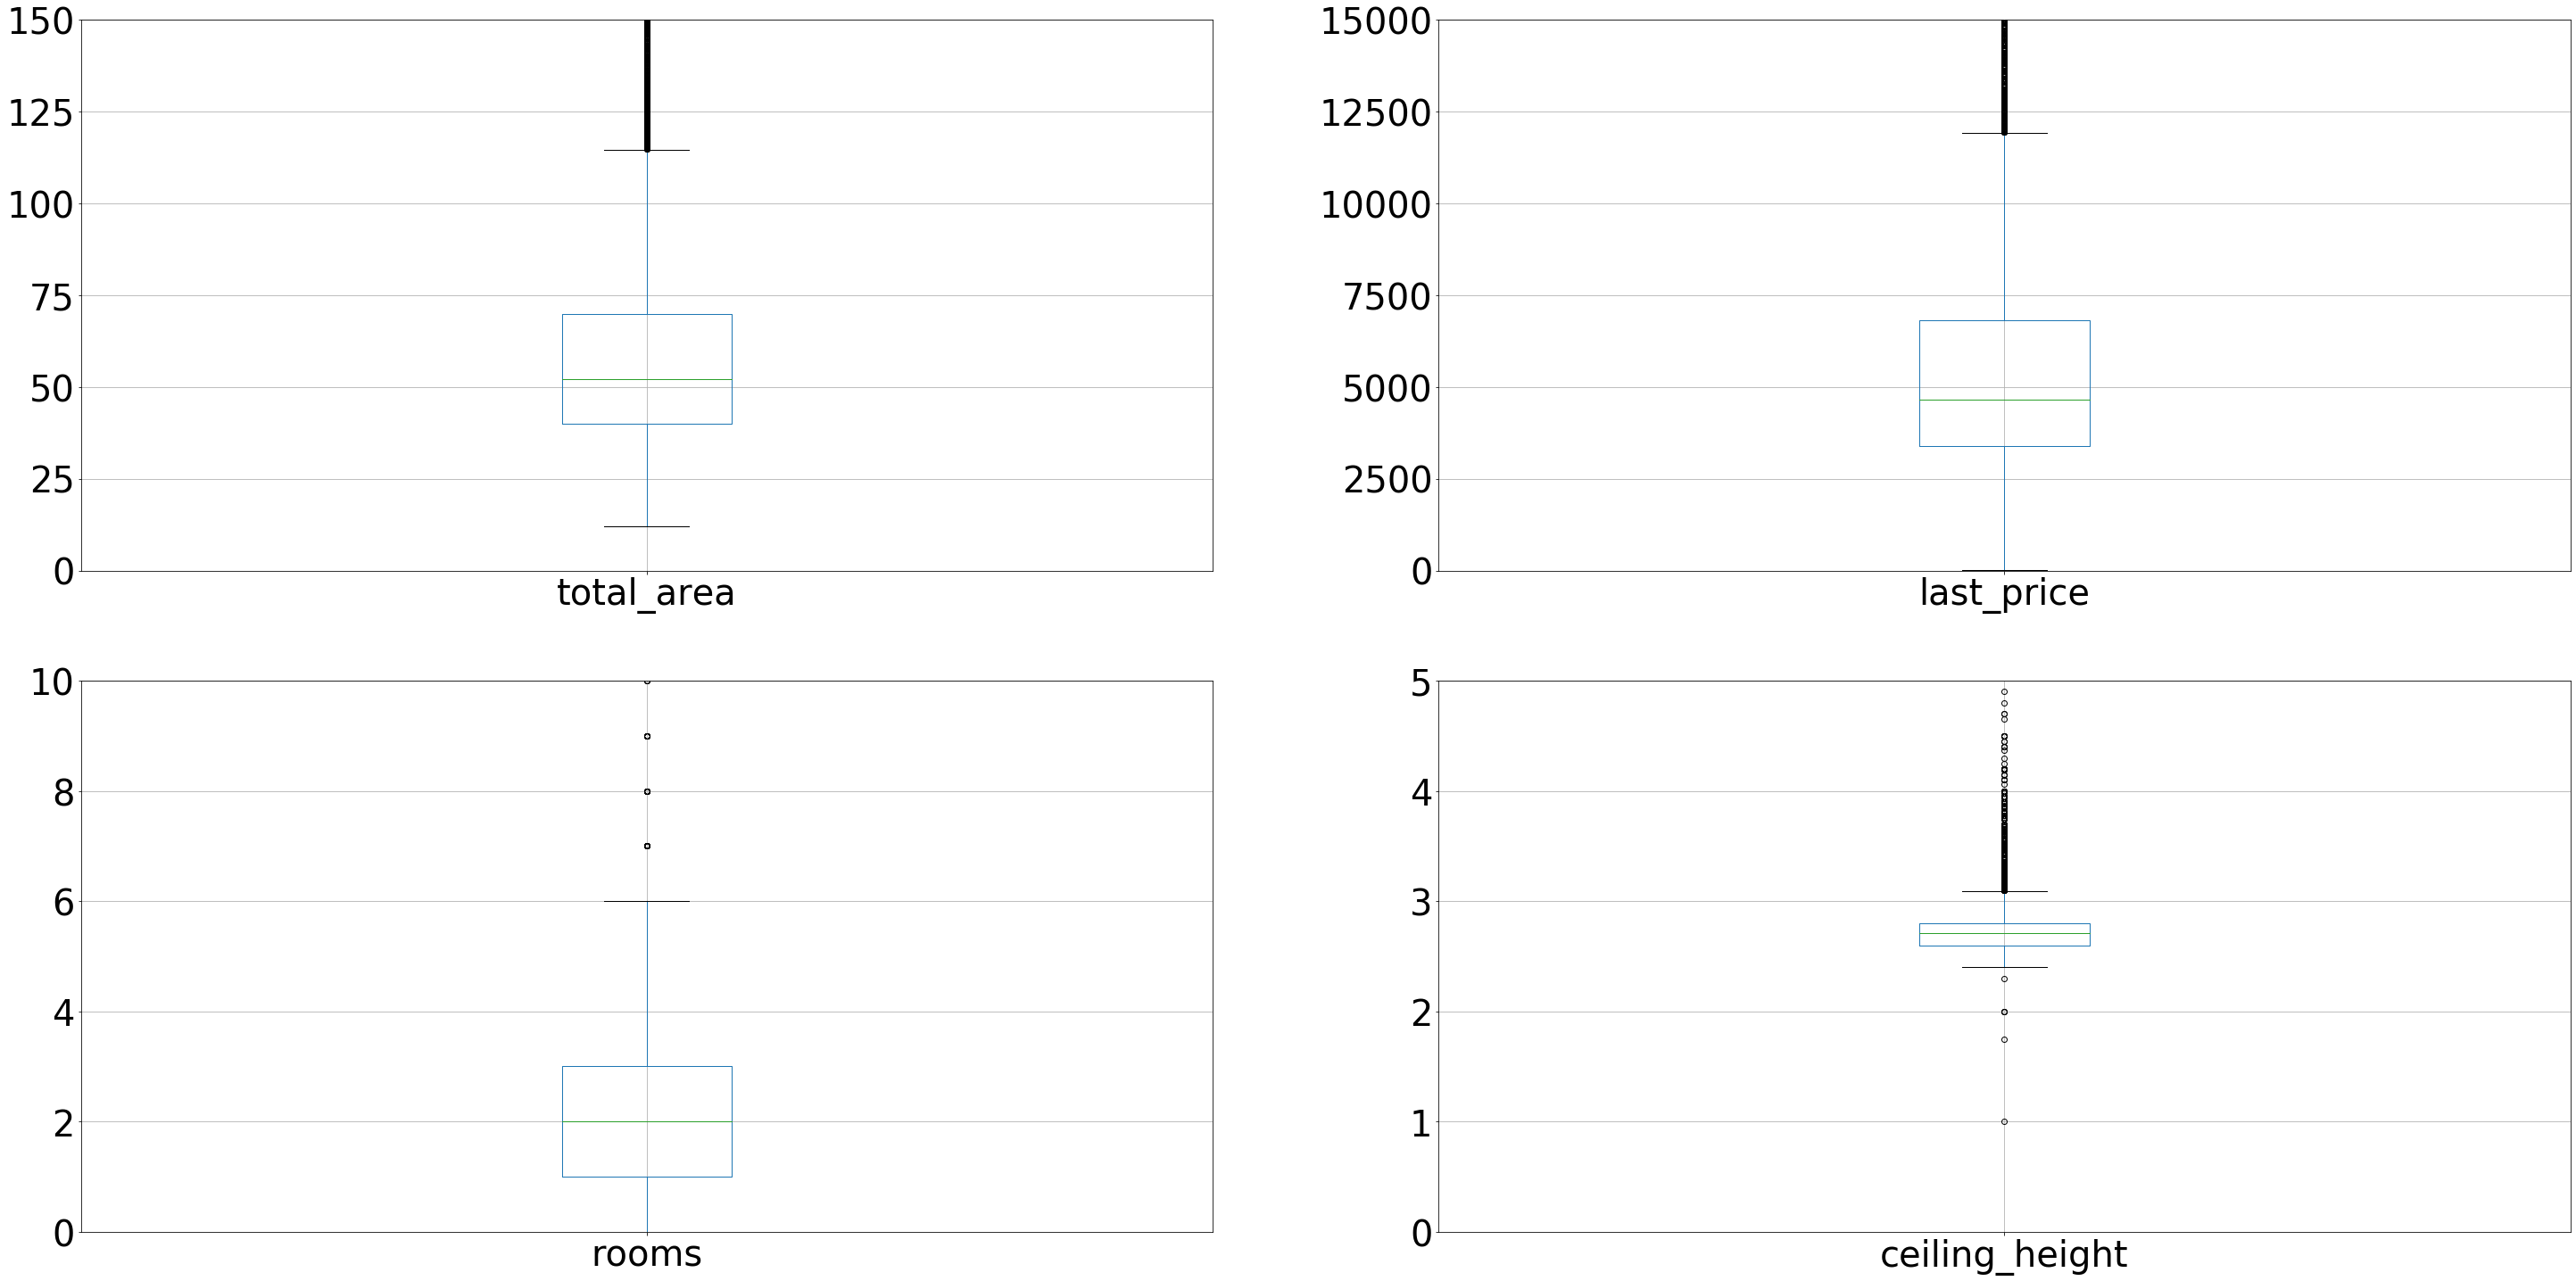

In [56]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [150, 15000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = realty.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])

        count += 1

Определяем границы для построения гистограмм (убираем значения за пределами усов):

* **total_area** - 12-120 кв.м.;  
* **last_price** - 1000-12000 тыс.р.;  
* **rooms** - 0-6 комнат;  
* **ceiling_height** - 2,3-3,2м.  

**Гистограммы площади, цены, числа комнат, высоты потолка** <a name="ИАГОП"></a>

Создадим словарь с названием столбцов и границами значений для каждого столбца и напишем функцию для прорисовки гистограмм

In [57]:
xlist_dict = {'total_area': [12,120], 'last_price':[1000,12000], 'rooms':[0,6], 'ceiling_height':[2.3,3.2]}
def realty_hist(df, column, name):
        if column == 'rooms':
            plot = df[column].plot(title=name, xlim=xlist_dict[column], kind='hist', bins=20, ec='black')
        else:
            plot = df[column].plot(title=name, xlim=xlist_dict[column], kind='hist', bins=300, ec='black')
        return plot
    

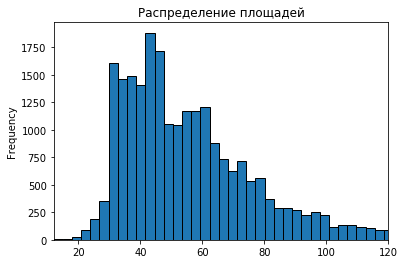

In [58]:
realty_hist(realty,'total_area', 'Распределение площадей');

**Гистограмма "Распределение площадей"** - большая часть квартир имеет метраж от 30 до 65 кв.м., пик приходится на 40-50 кв.м. Есть квартиры и больше 100 кв.м, но их немного.

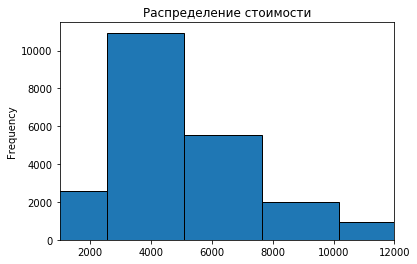

In [59]:
realty_hist(realty,'last_price', 'Распределение стоимости');

**Гистограмма "Распределение стоимости"** - большая часть квартир стоит от 3 до 7,5 млн. рублей, пик приходится на 3-5 млн. рублей. Есть квартиры дороже 10 млн., но их немного.

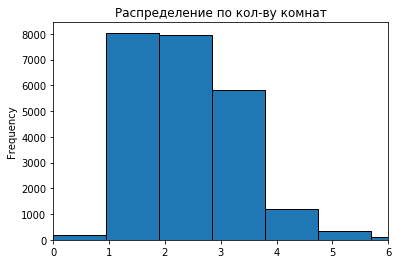

In [60]:
realty_hist(realty,'rooms', 'Распределение по кол-ву комнат');

**Гистограмма "Распределение по количеству комнат"** - как и ожидалось в основном продаются одно-, двух-, трёхкомнатные квартиры; студии и квартиры с количеством комнат от 4 и больше составляют небольшой процент продаж 

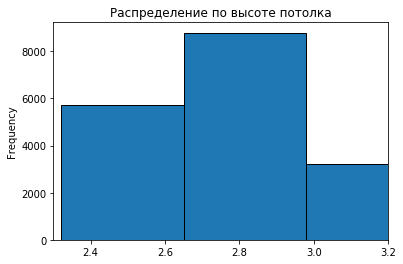

In [61]:
realty_hist(realty,'ceiling_height', 'Распределение по высоте потолка');

**Гистограмма "Распределение квартир по высоте потолка"** - высота потолка в большей части квартир составляет от 2,65 до 2,9 м (стандартная высота), но есть и квартиры с потолками 2,3м и выше 3м

In [62]:
def realty_hist_new(df, column, name, nbins=11):
        plot = df[column].plot(title=name, xlim=xlist_dict[column], kind='hist', bins=nbins, ec='black')
        return plot

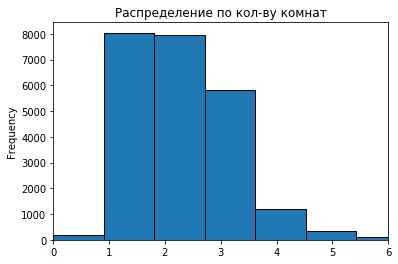

In [63]:
realty_hist_new(realty,'rooms', 'Распределение по кол-ву комнат', 21);

## 7.Исследовательский анализ: изучаем время продажи квартиры <a name="ИАВП"></a>

Посмотрим статистику по данным столбца days_exposition

In [64]:
realty['days_exposition'].describe().to_frame()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


Среднее время продаж 180 дней мне кажется это много, медианное 95 - 3 месяца отличный срок для продажи квартиры, минимальное время - 1 день, это, наверное, ошибочное размещение, а максимальное значение - почти 5 лет, думаю, объявление не было закрыто на сайте.   
Построим гистограмму

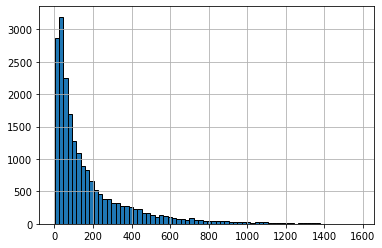

In [65]:
realty['days_exposition'].hist(bins=70, ec='black');

Построим boxplot, чтобы определить выбивающиеся значения

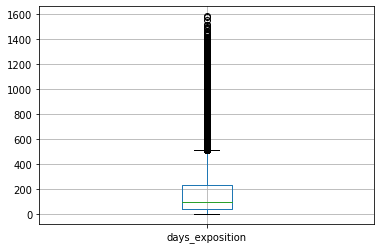

In [66]:
realty.boxplot(column='days_exposition');

Ограничим время размещения 500 днями, чтоб убрать выбросы.   
Построим гистограмму:

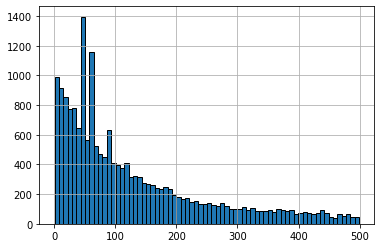

In [67]:
realty.query('days_exposition<500')['days_exposition'].hist(bins=70, ec='black');

На гистограмме видны аномально высокие продажи в районе до 100 дней, ограничим время размещения 100 днями и ещё раз построим гистограмму:

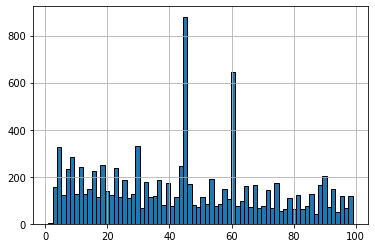

In [68]:
realty.query('days_exposition<100')['days_exposition'].hist(bins=70, ec='black');

Приблизим ещё немного и ограничимся периодом от 25 до 65 дней

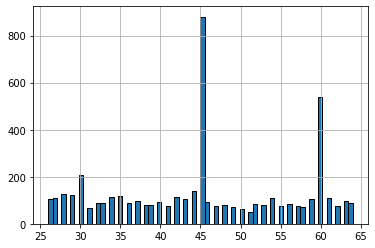

In [69]:
realty.query('25<days_exposition<65')['days_exposition'].hist(bins=70, ec='black');

Итак мы видим аномальный рост продаж на 45 и 60 день размещения и немного выбивающиеся значения на 30 днях. Согласно действующим правилам размещения объявлений на Яндекс.Недвижимость в Санкт-Петербурге: срок размещения бесплатных объявлений 90 дней, период размещения платных 30 дней, этим можно объяснить рост продаж в период кратный 30 (это снятие объявлений с размещения), но это не объясняет пик продаж на 45 день. Могу лишь предположить, что возможно необходимо обновлять объявление каждые 15 дней и если это не происходит, объявление автоматически закрывается.  
Посмотрим на гистограмму, исключив значения кратные 15.

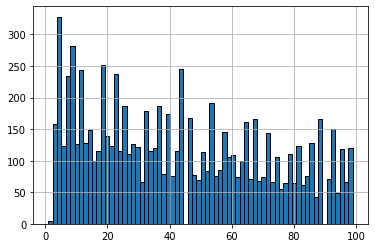

In [70]:
realty.query('days_exposition<100 & days_exposition not in (15, 30, 45, 60, 75, 90)')['days_exposition'].hist(bins=70, ec='black');

Посмотрим на статистику, если ограничим срок размещения 6 месяцами и исключим значения кратные 15 

In [71]:
realty.query('days_exposition<=180 & days_exposition not in (15,30,45,60,75,90,105,120,135,150,165,180)')['days_exposition'].describe()

count    11752.000000
mean        69.001276
std         49.529117
min          1.000000
25%         25.000000
50%         60.000000
75%        106.000000
max        179.000000
Name: days_exposition, dtype: float64

Среднее значение пости приблизилось к медианному и составляет +- 2 месяца, думаю что большинство квартир продаются примерно в эти сроки.

Итого: обнаружили выбивающиеся значения на днях размещения кратных 15, сделали предположения о том, что в эти дни проходит автоматическое закрытие объявления, если нет подтверждения продления

## 8. Исследовательский анализ: изучаем влияние факторов на стоимость квартиры
<a name="ИАЦК"></a>

Сначала опишем функцию, с помощью котой будем строить графики зависимости цены от различных факторов

In [72]:
def price_plot (df, column, name, ylims=None):
    df_sort = df.pivot_table(index= column, values='last_price', aggfunc='median')
    if ylims is None:
        plot = df_sort.sort_values(column).plot(y='last_price', kind='bar',figsize=(10,5), title = name)
    else:
        plot = df_sort.sort_values(column).plot(y='last_price', kind='bar',figsize=(10,5), title = name, ylim = ylims)
    return plot

**Зависимость стоимости квартиры от количества комнат**<a name="ИАЦККК"></a>

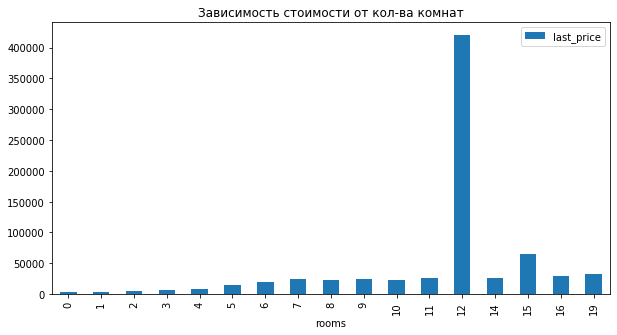

In [73]:
price_plot(realty, 'rooms', 'Зависимость стоимости от кол-ва комнат');

Ожидаемо, что чем больше комнат, тем выше цена, выбивающееся значение 12 комнат, построим boxplot, чтобы посмотреть выбросы

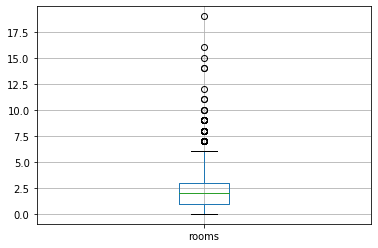

In [74]:
realty.boxplot(column='rooms');

Ограничим количество комнат шестью и еще раз построим график зависимости

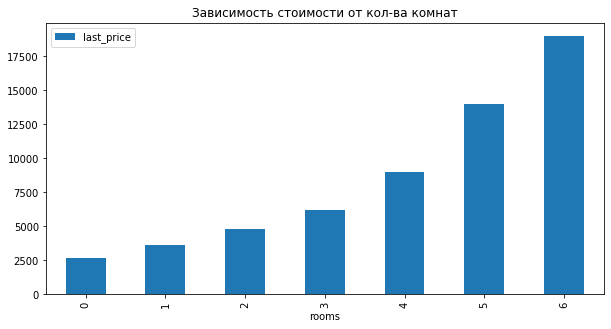

In [75]:
price_plot(realty.query('rooms <= 6'), 'rooms', 'Зависимость стоимости от кол-ва комнат');

Итог: теперь мы видим прямую зависимость стоимости квартиры от количества комнат: чем больше комнат, тем выше стоимость

**Зависимость стоимости квартиры от близости к центру** <a name="ИАЦКБЦ"></a>

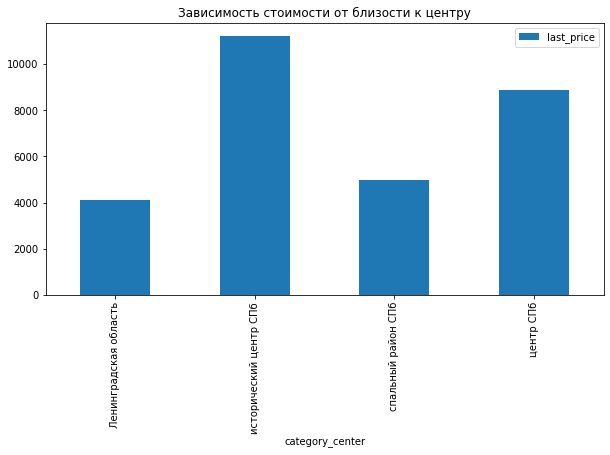

In [76]:
price_plot(realty, 'category_center', 'Зависимость стоимости от близости к центру');

График подтверждает очевидное, чем ближе к Дворцовой и к центру, тем дороже стоят квартиры

**Зависимость стоимости от этажа квартиры** <a name="ИАЦКЭК"></a>

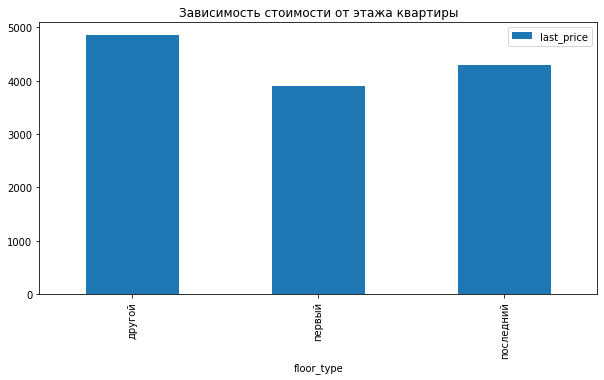

In [77]:
price_plot(realty, 'floor_type', 'Зависимость стоимости от этажа квартиры');

Можно сделать вывод, что квартиры на первом этаже дешевле остальных, но, что удивительно, квартиры на последних этажах незначительно, но всё же дешевле, чем квартиры расположенные на этажах отличных от первого и последнего (на это не мог повлиять выбранный нами способ заполнения пропусков по данным floor_total , тк их было незначительное количество).

**Зависимость стоимости квартиры от дня размещения объявления** <a name="ИАЦКДН"></a>

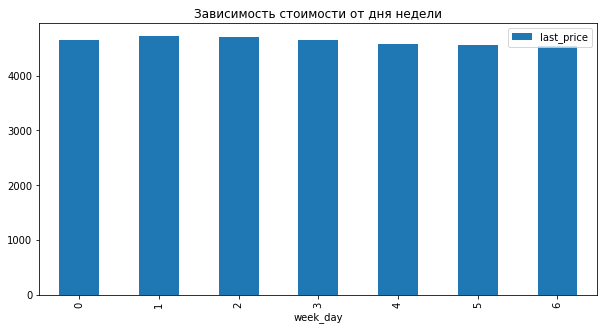

In [78]:
price_plot(realty, 'week_day', 'Зависимость стоимости от дня недели');

На первый взгляд никакой зависимости не наблюдается, посмотрим поближе

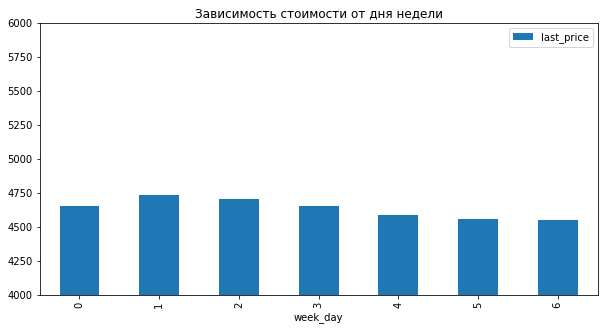

In [79]:
price_plot(realty, 'week_day', 'Зависимость стоимости от дня недели', ylims=(4000, 6000));

Поближе ярко выраженной зависимости так же не наблюдается, но можно отметить, что во вторник размещают к продаже квартиры немногим дороже, чем в другие дни недели

**Зависимость стоимости от месяца размещения объявления** <a name="ИАЦКМР"></a>

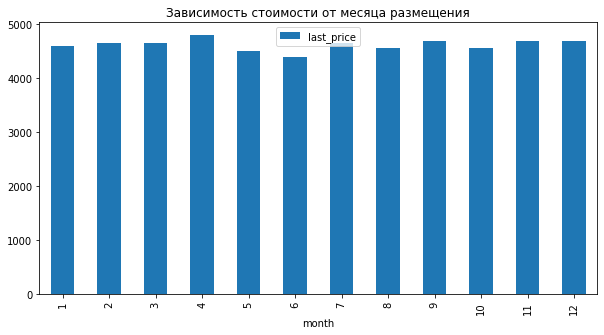

In [80]:
price_plot(realty, 'month', 'Зависимость стоимости от месяца размещения');

Опять-таки посмотрим поближе

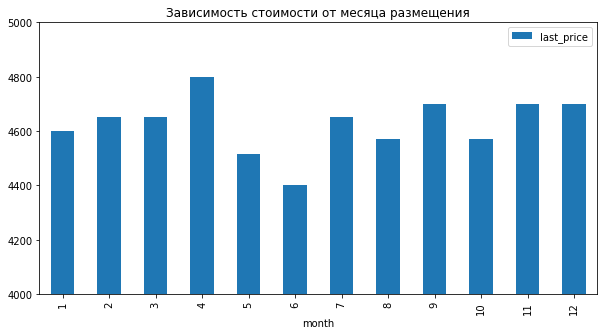

In [81]:
price_plot(realty, 'month', 'Зависимость стоимости от месяца размещения', ylims=(4000, 5000));

Можно сделать не самый очевидный вывод, что в апреле (в преддверии лета) размещают объявления о продаже более дорогих квартир, летом в период отпусков спад продаж и как следствие падение цены, к концу года цены поднимаются

**Зависимость стоимости от года размещения объявления** <a name="ИАЦКГР"></a>

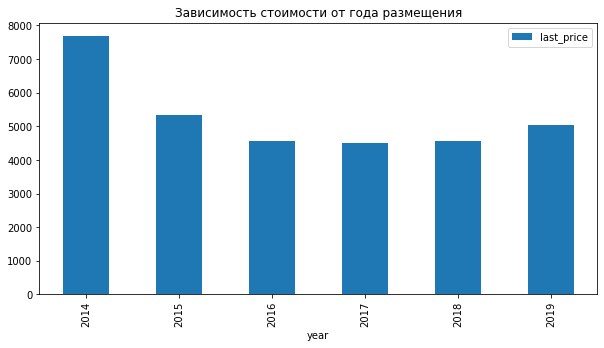

In [82]:
price_plot(realty, 'year', 'Зависимость стоимости от года размещения');

Посмотрим на данные поближе

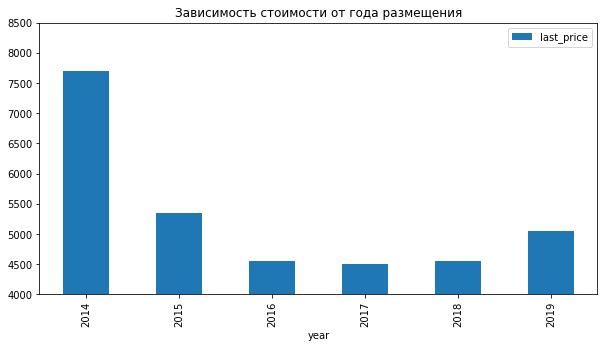

In [83]:
price_plot(realty, 'year', 'Зависимость стоимости от года размещения', ylims=(4000, 8500));

В течении 2014 года произошел ряд событий, который привёл к тому что размер ключевой ставки Центрального Банка РФ был поднят с 5,5% в начале года до 17% в декабре 2014, что привело, в том числе, к повышению ставок по ипотеке и кризису в 2015 году, соответственно спрос на недвижимость и, как следствие, стоимость недвижимости резко снизилась. Снижение стоимости продолжалось до 2017 года, с 2018 наметился рост, который продолжался до 2019 года. В 2020 году скорее всего рост рынка недвижимости замедлится в связи с пандемией и экономическим кризисом 

Построим диаграмму размаха для стоимости по годам

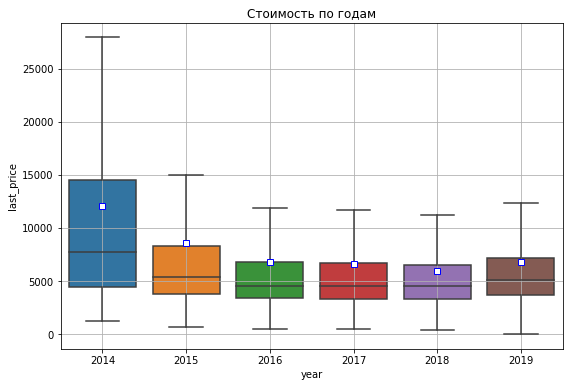

In [84]:

#сортировка по медиане
tmp = \
    realty\
    .groupby('year', as_index=False)\
    .agg({'last_price':'median'})\
    .sort_values(by='year', ascending=True).reset_index()

plt.figure(figsize=(9,6))
sns.boxplot(x='year', y= 'last_price', data=realty, showfliers=False, order=tmp['year'].to_list(), showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title('Стоимость по годам')
plt.grid(True)
plt.show()

<hr style="border: 2px solid green;" />

**Корреляция окончательной стоимости квартиры с различными факторами** <a name="ИАЦККОР"></a>

Изучим матрицу корреляции

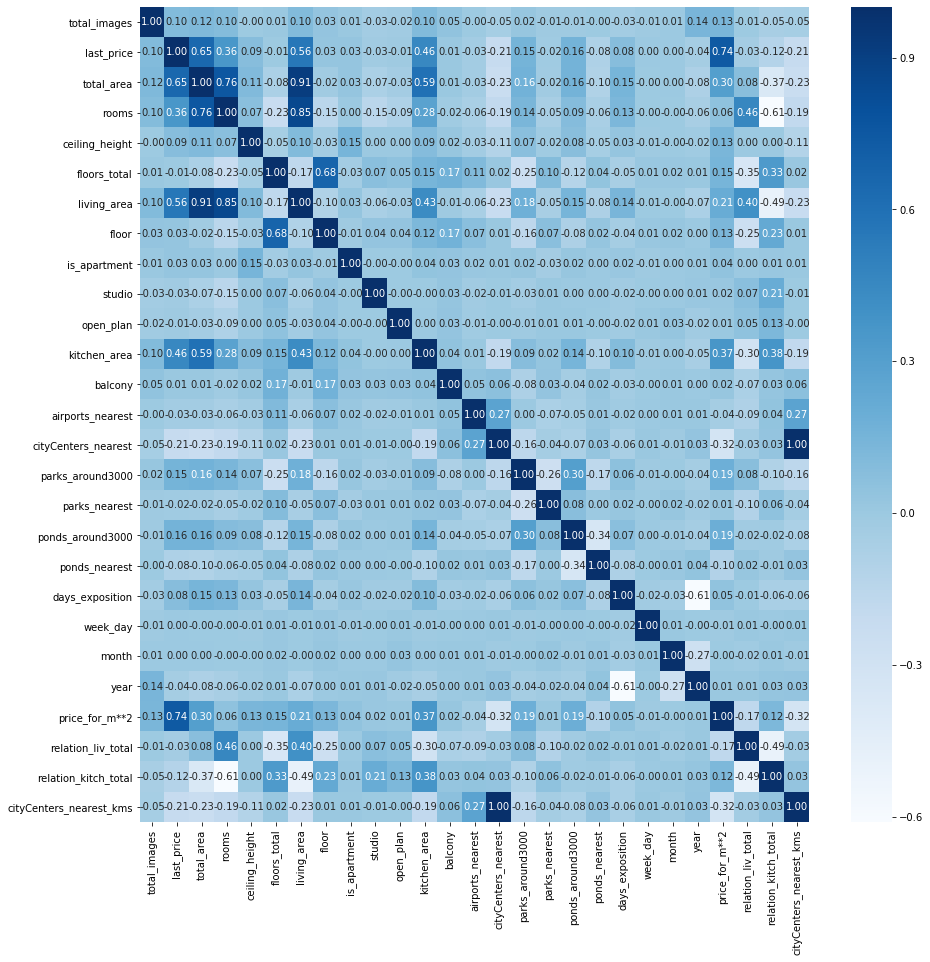

In [85]:
plt.figure(figsize=(15,15))
sns.heatmap(realty.corr(), annot=True, cmap="Blues", fmt='.2f');

Отсортируем матрицу по столбцу last_price, чтобы посмотреть как коррелирует цена с остальными данными

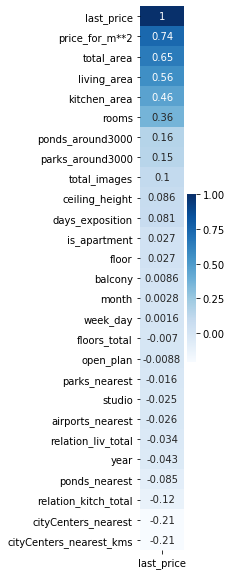

In [86]:
plt.figure(figsize=(1,10))
sns.heatmap(realty.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True);

Вывод: делаем вывод, что чем больше площадь (общая, жилая, кухня) и больше комнат в квартире тем выше цена, так же цена выше если рядом есть парки и водоёмы. И отрицательная корреляция: чем дальше от центра (расстояние от  центра больше), тем ниже цена.

## 9.Исследовательский анализ: изучаем населенные пункты с наибольшим числом объявлений <a name="ИА10"></a>

Выберем 10 населённых пунктов с наибольшим числом объявлений. Создаём датафрейм содержащий среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Данные берем из столбца locality_name.

In [87]:
top10 = realty['locality_name'].value_counts().index.tolist()[:10]
mean10_m2 = [realty[realty['locality_name'] == city]['price_for_m**2'].median().round(2) for city in top10]
mean10_price = [realty[realty['locality_name'] == city]['last_price'].median() for city in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': mean10_m2, 'Средняя цена за квартиру, тыс. руб.': mean10_price}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

,Город,"Средняя цена за кв.м., тыс. руб.","Средняя цена за квартиру, тыс. руб."
0,Санкт-Петербург,104.76,5500.0
4,Пушкин,100.00,5180.0
8,деревня Кудрово,91.86,3790.0
6,посёлок Парголово,91.64,4100.0
1,посёлок Мурино,85.88,3400.0
2,посёлок Шушары,76.88,3950.0
5,Колпино,74.72,3600.0
7,Гатчина,67.80,3100.0
3,Всеволожск,65.79,3450.0
9,Выборг,58.16,2897.0


Итог: самые дорогие квартиры в Санкт-Петербурге и парковом городе Пушкине это видно и по цене за квартиру и по цене за квадратный метр. Самая низкая стоимость в городе Выборг. Из таблицы можно сделать вывод, чем дальше отСанкт-Петербурга, тем дешевле.

## 10.Исследовательский анализ: выделение центральной зоны Санкт-Петербурга
<a name="ИАЦЗ"></a>

Изучим предложения квартир. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. У нас есть столбец с расстоянием до центра в км, посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [88]:
# Сделаем срез по значению "Санкт-Петербург" и сохраним его в переменной realty_spb
realty_spb = realty.query('locality_name == "Санкт-Петербург"')

Посмотрим на график зависимости стоимости квартир в Санкт-Петербурге от удалённости от центра

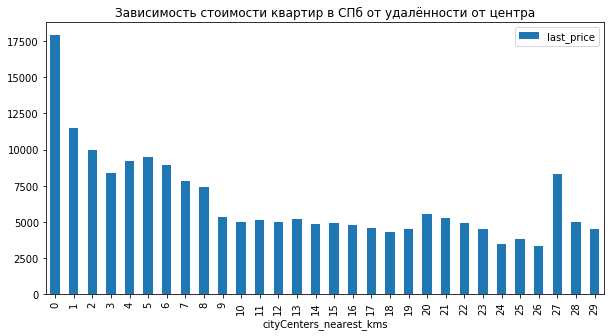

In [89]:
price_plot(realty_spb, 'cityCenters_nearest_kms', 'Зависимость стоимости квартир в СПб от удалённости от центра');

На графике четко видно снижение цены после 8ого километра, этим значением и ограничим центр Санкт-Петербурга

## 11.Исследовательский анализ: изучаем влияние факторов на стоимость квартиры в центре Санкт-Петербурга <a name="ИАЦФ"></a>

Выделим сегмент квартир в центральной зоне (до 8 км включительно) и проанализируем эту территорию - изучим следующие параметры:

* площадь; 

* цена;

* число комнат;

* высота потолков.

In [90]:
# Сделаем срез таблицы realty_spb по значению удалённости от центра не более 8км и сохраним его в переменной realty_in_center
realty_in_center = realty_spb.query('cityCenters_nearest <= 8000')

**Гистограммы площади, цены, числа комнат, высоты потолка квартир в центре Санкт-Петербурга** <a name="ИАЦФГ"></a>

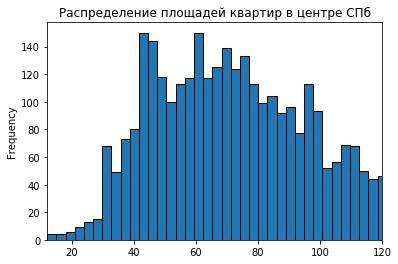

In [91]:
realty_hist(realty_in_center,'total_area', 'Распределение площадей квартир в центре СПб');

**Гистограмма распределения площадей квартир в центре СПб** - большая часть квартир в центре имеет площадь от 45 до 100 кв.м, что отличается от распределения по общей таблицы, там основные значения площади квартиры приходились на 30-65 кв.м. Значит в центре продаются квартиры бОльших площадей, чем в среднем по городу

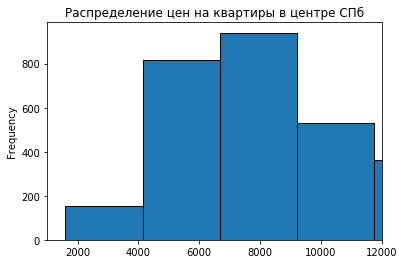

In [92]:
realty_hist(realty_in_center,'last_price', 'Распределение цен на квартиры в центре СПб');

**Гистограмма распределения цен на квартиры в центре СПб** - пик цен на недвижимость в центре приходится на значения 7-9 млн рублей, что выше чем в среднем по городу (средние значения по городу составляли 3-7,5 млн.р) и это логично квартиры в центре всегда дороже, тем более и средние значения площади квартир в центре тоже больше.

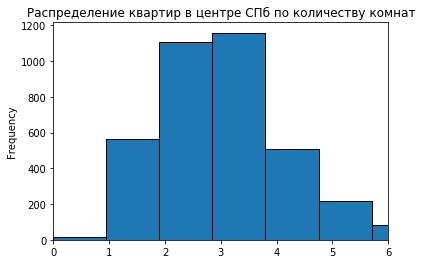

In [93]:
realty_hist(realty_in_center,'rooms', 'Распределение квартир в центре СПб по количеству комнат');

**Гистограмма распределения квартир в центре СПб по количеству комнат** - здесь так же как и по всему городу в основном продаются двух-, трёхкомнатные квартиры, но есть и квартиры с бОльшим количеством комнат

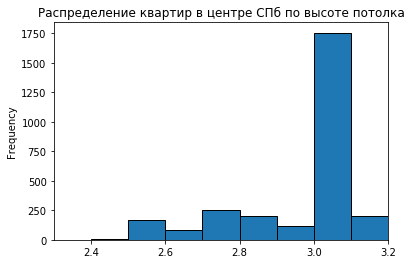

In [94]:
realty_hist(realty_in_center,'ceiling_height', 'Распределение квартир в центре СПб по высоте потолка');

**Гистограмма распределения квартир в центре СПб по высоте потолка** - в центре высокие потолки в основном выше 3м т.е. выше чем в среднем по городу, но есть и квартиры со стандартными для города потолками 2,7-2,8м

**Зависимость стоимости квартир в центре Санкт-Петербурга от количества комнат в квартире** <a name="ИАЦФКК"></a>

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Исследуем зависимость цены на квартиру в центральной зоне Санкт-Петербурга от количества комнат:

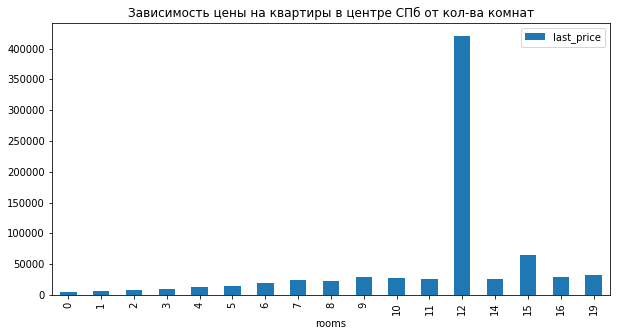

In [95]:
price_plot(realty_in_center, 'rooms', 'Зависимость цены на квартиры в центре СПб от кол-ва комнат');

Видна такая же зависимость как и во всем городе, чем больше комнат, тем выше цена. Посмотрим поближе,  ограничив количество комнат 11, чтобы убрать выбивающиеся 12 комнат

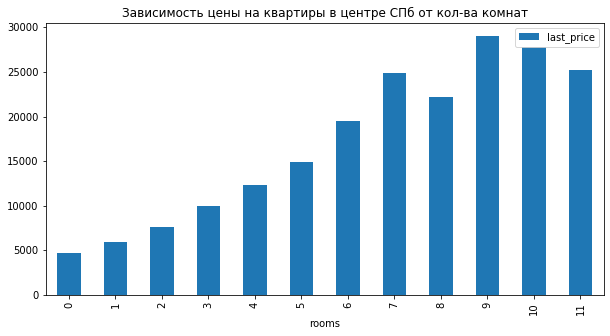

In [96]:
price_plot(realty_in_center.query('rooms <= 11'), 'rooms', 'Зависимость цены на квартиры в центре СПб от кол-ва комнат');

Вывод тот же чем больше комнат, тем выше цена, небольшая разница которая есть между 7 и 8 комнатными квартирами и между 10 и 11, думаю связаны в большей степени с общей площадью квартир и качеством ремонта.

**Зависимость цены на квартиры в центре СПб от этажа** <a name="ИАЦФЭК"></a>

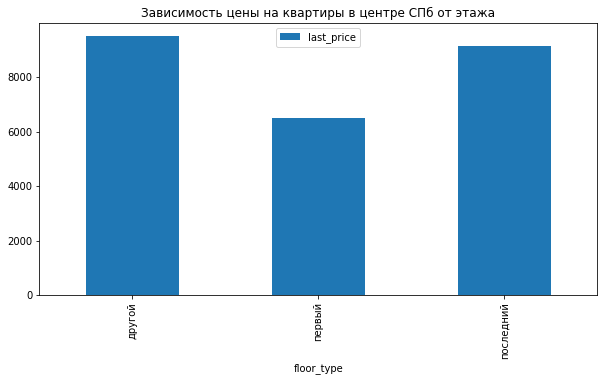

In [97]:
price_plot(realty_in_center, 'floor_type', 'Зависимость цены на квартиры в центре СПб от этажа');

Итог: в центре так же как и в городе в целом самые дешевые квартиры на первом этажа, а разрыв в цене между "другими" и последними этажами не очень большой, но всё же квартиры на "других" этажах дороже.

**Зависимость цены на квартиры в центре СПб от удаленности от Эрмитажа** <a name="ИАЦФБЦ"></a>

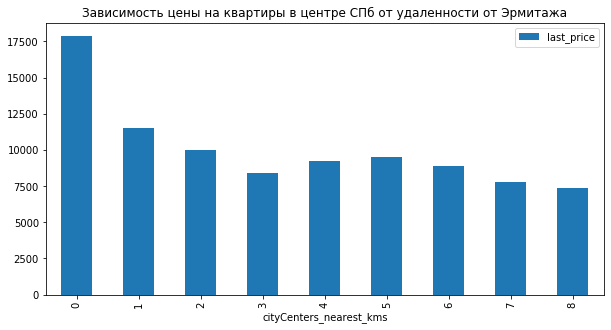

In [98]:
price_plot(realty_in_center, 'cityCenters_nearest_kms', 'Зависимость цены на квартиры в центре СПб от удаленности от Эрмитажа');

Итог: здесь всё ожидаемо, самые дорогие квартиры в пределах километра от Дворцовой

**Зависимость цены на квартиры в центре СПб от даты размещения объявления** <a name="ИАЦФДР"></a>

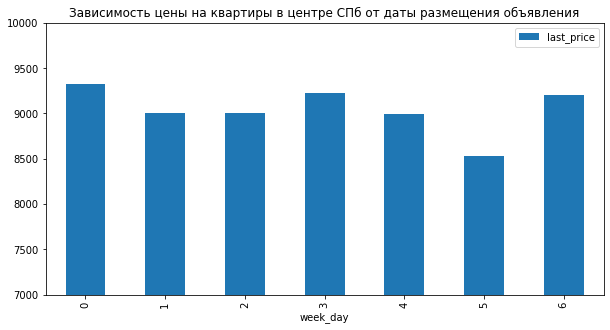

In [99]:
price_plot(realty_in_center, 'week_day', 'Зависимость цены на квартиры в центре СПб от даты размещения объявления', ylims=(7000, 10000));

Итог: прямой зависимости между ценой и днем недели когда размещается объявление не видно, разве что в понедельник выставляют квартиры немногим дороже чем в остальные дни недели

**Зависимость цены на квартиры в центре СПб от месяца размещения объявления** <a name="ИАЦФМР"></a>

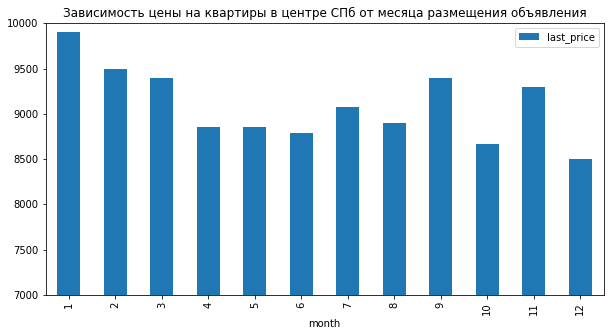

In [100]:
price_plot(realty_in_center, 'month', 'Зависимость цены на квартиры в центре СПб от месяца размещения объявления', ylims=(7000, 10000));

Итог: более дорогие квартиры в центре выставляют на продажу в январе, тогда как по городу у нас лидировал апрель

**Зависимость цены на квартиры в центре СПб от года размещения объявления** <a name="ИАЦФГР"></a>

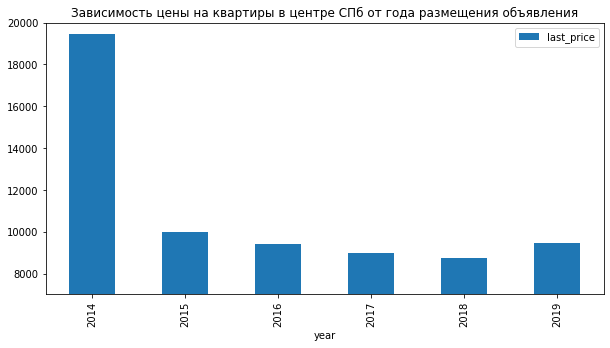

In [101]:
price_plot(realty_in_center, 'year', 'Зависимость цены на квартиры в центре СПб от года размещения объявления', ylims=(7000, 20000));

Итог: здесь положение такое же как и в общем по городу. Резкое падение цен в 2015 году вследствие обвала рубля и экономического кризиса, падение цен на квартиры в центре продолжались до 2018 года, в 2019 наметился рост, который скорее всего замедлится в связи с событиями 2020 года

**Матрица корреляции для квартир в центре Санкт-Петербурга** <a name="ИАЦФКОР"></a>

Посмотрим как цена коррелирует с основными факторами

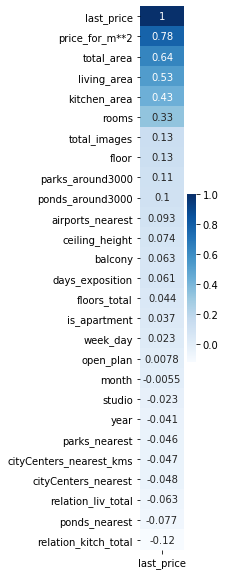

In [102]:
plt.figure(figsize=(1,10))
sns.heatmap(realty_in_center.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True);

Вывод: в большей степени цена коррелирует с площадями (общая, жилая, кухня), с количеством комнат в квартире и с этажом квартиры и в меньшей степени с наличием парков и прудов рядом.

## 12. Исследовательский анализ: сравнение результатов исследований квартир в центре Санкт-Петербурга с результатами по всему городу <a name="ИАСА"></a>

Посмотрим на гистограмме как распределяются площади квартир в центре СПб и во всём городе

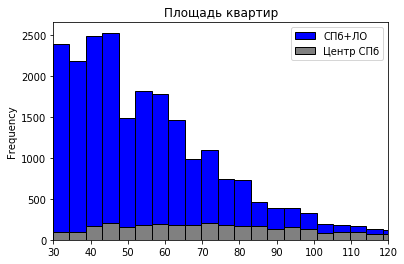

In [103]:
ax = plt.gca()

realty.loc[:, 'total_area'].plot(title='Площадь квартир', kind='hist', bins=200, color='blue',ec='black', ax=ax, xlim=(30,120))
realty_in_center.loc[:, 'total_area'].plot(kind='hist', bins=200, color='grey',ec='black', ax=ax, xlim=(30,120))

plt.legend(['СПб+ЛО', 'Центр СПб']);

Вывод: видим, что в городе основная часть квартир площадью до 65 кв.м, а в центре большая часть квартир имеет площадь от 50 до 100 кв.м

Теперь построим гистограммы цен

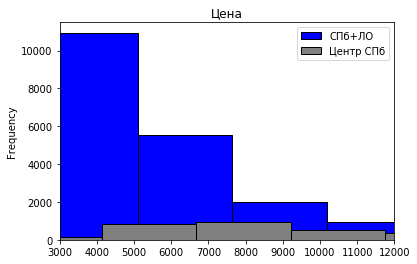

In [104]:
ax = plt.gca()

realty.loc[:, 'last_price'].plot(title='Цена', kind='hist', bins=300, color='blue',ec='black', ax=ax, xlim=(3000,12000))
realty_in_center.loc[:, 'last_price'].plot(kind='hist', bins=300, color='grey',ec='black', ax=ax, xlim=(3000,12000))

plt.legend(['СПб+ЛО', 'Центр СПб']);

Вывод: если в городе большая часть квартир стоит от 3 до 7,5 млн.руб., то в центре квартиры дороже от 4.5 до 9,5 млн.руб

Теперь сравним зависимость цен на квартиры в центре Санкт-Петербурга и в городе в целом от количества комнат, этажа квартиры 

Смотрим зависимость цены от количества комнат, помним о выбросах, поэтому ограничим количество комнат шестью

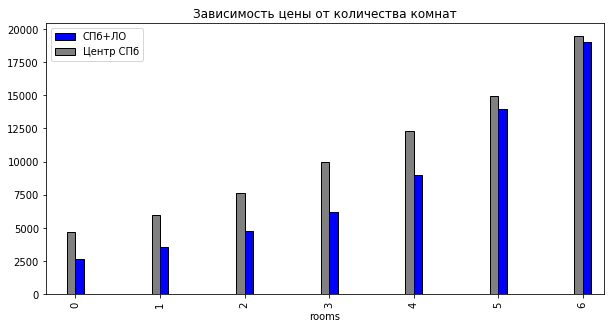

In [105]:
ax = plt.gca()
    
realty.query('rooms <= 6').pivot_table(index= 'rooms', values='last_price', aggfunc='median').sort_values(by='rooms').plot(
    y='last_price', kind='bar',figsize=(10,5), title = 'Зависимость цены от количества комнат', ax=ax, color='blue',ec='black', width=0.1, position=0)
realty_in_center.query('rooms <= 6').pivot_table(index= 'rooms', values='last_price', aggfunc='median').sort_values(by='rooms').plot(
    y='last_price', kind='bar',figsize=(10,5), ax=ax, color='grey',ec='black', width=0.1, position=1)

plt.legend(['СПб+ЛО', 'Центр СПб']);

Вывод: для обоих территорий наблюдается рост цен с увеличением числа комнат; цены на квартиры в центре стабильно выше чем цены в среднем по городу

Смотрим зависимость цены от этажа квартиры

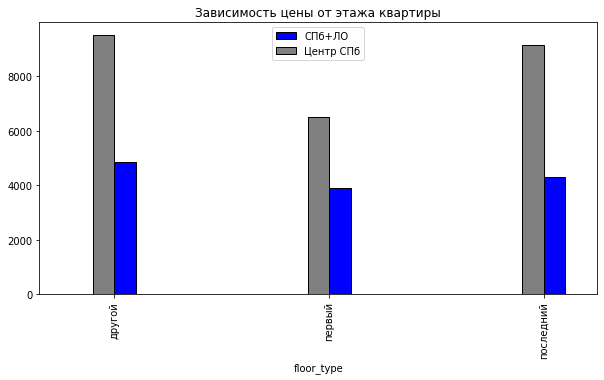

In [106]:
ax = plt.gca()
    
realty.pivot_table(index= 'floor_type', values='last_price', aggfunc='median').sort_values(by='floor_type').plot(
    y='last_price', kind='bar',figsize=(10,5), title = 'Зависимость цены от этажа квартиры', ax=ax, color='blue',ec='black', width=0.1, position=0)
realty_in_center.pivot_table(index= 'floor_type', values='last_price', aggfunc='median').sort_values(by='floor_type').plot(
    y='last_price', kind='bar',figsize=(10,5), ax=ax, color='grey',ec='black', width=0.1, position=1)

plt.legend(['СПб+ЛО', 'Центр СПб']);

Вывод: на первом этаже квартиры дешевле в обоих случаях. Общий ценовой тренд, что квартира в центре СПб дороже, чем в остальном СПб, сохраняется.

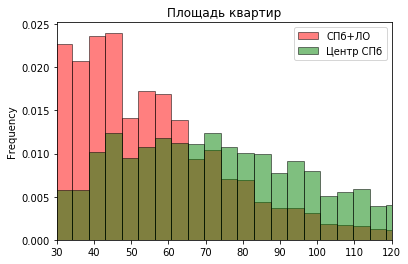

In [107]:
ax = plt.gca()

realty.loc[:, 'total_area'].plot(title='Площадь квартир', kind='hist', bins=200, color='red',ec='black', ax=ax, xlim=(30,120), alpha=0.5, density=True)
realty_in_center.loc[:, 'total_area'].plot(kind='hist', bins=200, color='green',ec='black', ax=ax, xlim=(30,120), alpha=0.5, density=True)

plt.legend(['СПб+ЛО', 'Центр СПб']);

### Шаг 5. Общий вывод

## 13.Исследовательский анализ: общий вывод <a name="ИАОВ"></a>

Сделаем выводы и на основе данных о корреляции, и на основе графиков. Определим как факторы влияют на конечную цену:


* **Площадь квартиры** - чем больше площадь квартиры, тем выше цена


* **Цена за квадратный метр** - чем больше цена за квадратный метр, тем выше цена 


* **Доля жилой площади/площадь кухни** - чем выше доля жилой площади/площадь кухни, тем выше цена


* **Количество комнат** - чем больше комнат, тем выше цена   


* **Этаж квартиры** - на первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных   


* **Удаленность от центра** - чем ближе к центру, тем дороже квартира. В сАмом центре (в пределах 1 км до Дворцовой) квартиры стоят на порядок дороже, чем более удаленные.  


* **День недели размещения объявления** - зависимости стоимости жилья от дня размещения объявления не наблюдается.   


* **Месяц размещения объявления** - квартиры, размещенные к продаже в летние месяцы, в среднем дешевле, чем размещенные в любые другие месяца, в конце года цены выше.  


* **Год размещения объявления** - квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - экономический кризис, цены на квартиры падали. 2019г.- цены начали расти.  